In [69]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize



In [70]:
#Loads the data from the scattered spectrum for the angle in question

channel, E, N = np.loadtxt('Archive 6/30_scatt_0512.tsv', unpack=True, skiprows=25)

dN = np.sqrt(N)
for i, value in enumerate(dN):
    if value == 0:
        dN[i] = 1.14

In [71]:
#Loads the data from the background spectrum for the angle in question

channel_bkg, E_bkg, N_bkg = np.loadtxt('Archive 6/30_bkg_0512.tsv', unpack=True, skiprows=25)

N_bkg = N_bkg/2102.81*1167.31

dN_bkg = np.sqrt(N_bkg)
for i, value in enumerate(dN_bkg):
    if value == 0:
        dN_bkg[i] = 1.14

In [72]:
#Subtracts the background from the scattered spectrum

N_bkg_sub = N - (N_bkg)

dN_bkg_sub = np.sqrt(N+N_bkg)
for i, value in enumerate(dN_bkg_sub):
    if value == 0:
        dN_bkg_sub[i] = 1.14
        


<IPython.core.display.Javascript object>


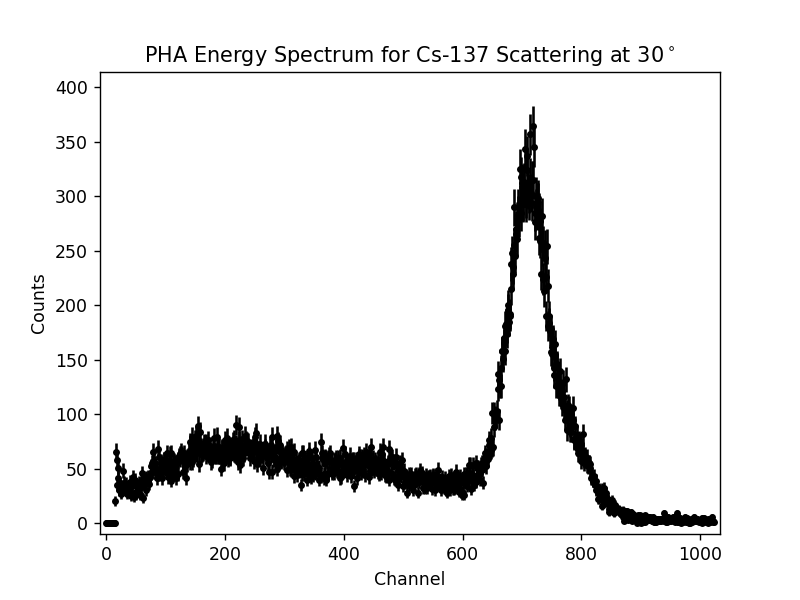

In [73]:
#Plots the scattered spectrum

fig = plt.figure()
ax = fig.add_subplot(111)
ax.errorbar(channel, N, dN, fmt='k.')
ax.axis([min(channel)-10,max(channel)+10,min(N)-10,max(N)+50])
ax.set_title('PHA Energy Spectrum for Cs-137 Scattering at 30$^\\circ$')
ax.set_xlabel('Channel')
ax.set_ylabel('Counts')

plt.savefig('Exp2_30_scatt_0512.pdf')
plt.show()

<IPython.core.display.Javascript object>


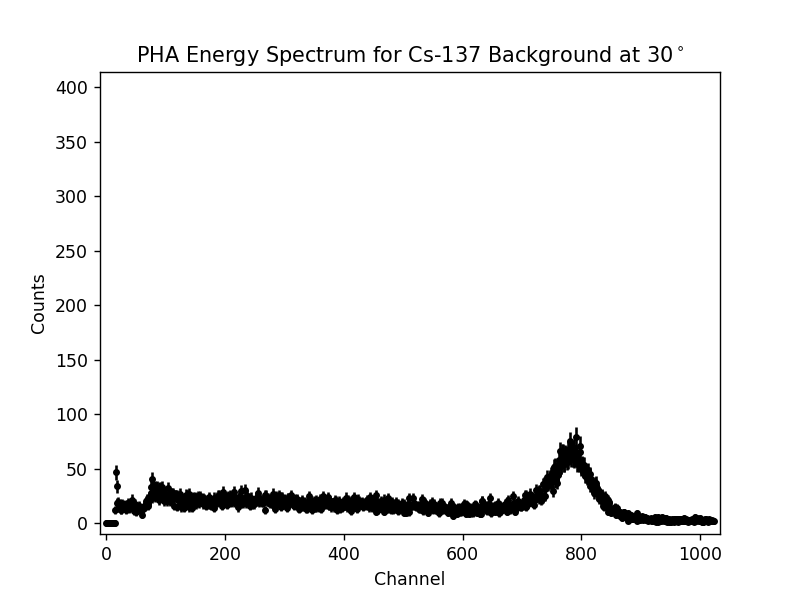

In [74]:
#Plots the background spectrum

fig = plt.figure()
ax = fig.add_subplot(111)
ax.errorbar(channel_bkg, N_bkg, dN_bkg, fmt='k.')
ax.axis([min(channel)-10,max(channel)+10,min(N_bkg)-10,max(N)+50])
ax.set_title('PHA Energy Spectrum for Cs-137 Background at 30$^\\circ$')
ax.set_xlabel('Channel')
ax.set_ylabel('Counts')

plt.savefig('Exp2_30_scatt_0512_bkg.pdf')
plt.show()

<IPython.core.display.Javascript object>


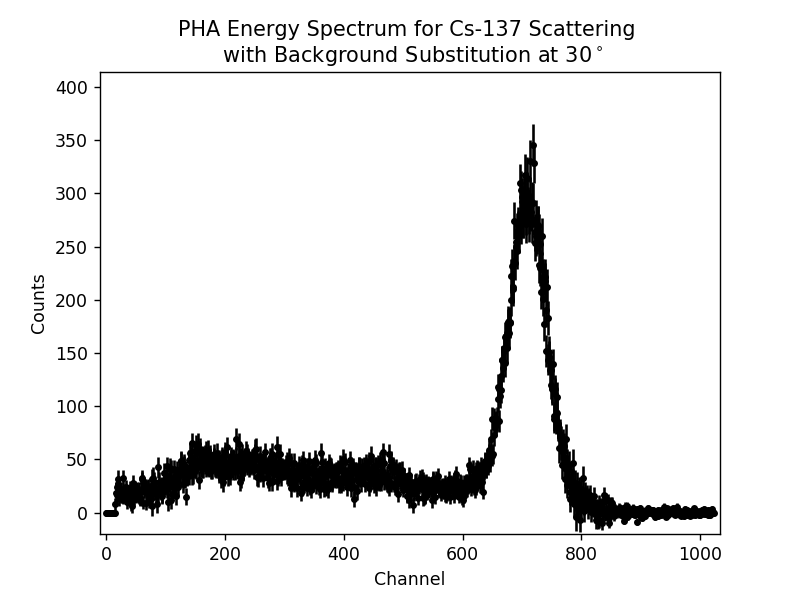

In [75]:
#Plots the background subtracted scattered spectrum

fig = plt.figure()
ax = fig.add_subplot(111)
ax.errorbar(channel, N_bkg_sub, dN_bkg_sub, fmt='k.')
ax.axis([min(channel)-10,max(channel)+10,min(N_bkg_sub)-10,max(N)+50])
ax.set_title('PHA Energy Spectrum for Cs-137 Scattering \n with Background Substitution at 30$^\\circ$')
ax.set_xlabel('Channel')
ax.set_ylabel('Counts')

plt.savefig('Exp2_30_scatt_0512_bkg_sub.pdf')
plt.show()

Converged with chi-squared 6184.49850985791
Number of degrees of freedom, dof = 245
Reduced chi-squared  25.24285106064453
Inital guess values:
  p0 = [5000.0, 800.0, 30.0, 500.0, 3]
Best fit values:
  pf = [-1.86457828e+03  9.04785354e+02 -2.09139918e+01  8.92378808e+02
 -1.02893458e+00]
Uncertainties in the best fit values:
  pferr = [397.0191204396632, 4.091802396752337, 2.5950603755369177, 8.753758703068362, 0.011036107320360195]


<IPython.core.display.Javascript object>


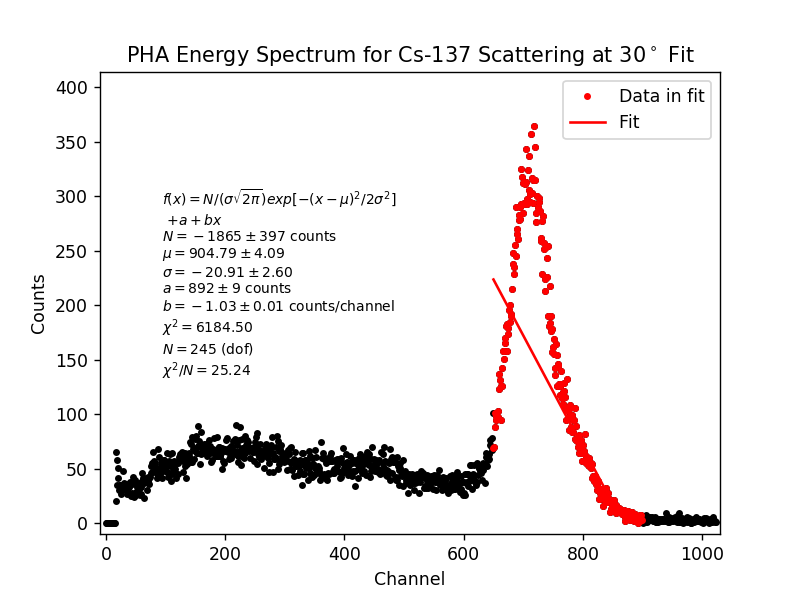

In [76]:
#Creating a fit for the scattered spectrum

def fitfunc(p,x):
    return (p[0]/(p[2]*np.sqrt(2*np.pi)))*np.exp(-(x-p[1])**2/((p[2]**2)*2))+p[3]+p[4]*x
def residual(p, x, y, err):
    return (fitfunc(p, x)-y)/err

p0 = [5000., 800., 30., 500., 3]


# Sets the lower and upper bounds of the region of interest

b=650
t=900

channel2 = channel[b:t]
N2 = N[b:t]
dN2 = dN[b:t]
pf, cov, info, mesg, success = optimize.leastsq(residual, p0, args=(channel2, N2, dN2),
                                                full_output=1)

if cov is None:
    print('Fit did not converge')
    print('Success code:', success)
    print(mesg)
else:
    chisq = sum(info['fvec']*info['fvec'])
    dof = len(channel2) - len(pf)
    pferr = [np.sqrt(cov[i,i]) for i in range(len(pf))]
    print('Converged with chi-squared', chisq)
    print('Number of degrees of freedom, dof =', dof)
    print('Reduced chi-squared ', chisq/dof)
    print('Inital guess values:')
    print('  p0 =', p0)
    print('Best fit values:')
    print('  pf =', pf)
    print('Uncertainties in the best fit values:')
    print('  pferr =', pferr)
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(channel, N, 'k.')
ax.plot(channel2, N2, 'r.', label='Data in fit')

    
# We then plot the fit function. We could plot it at each point in "channel2"
#  and connect those points with straight lines. However, we may want a smoother
#  plot. To do so, we create a new array of points using "linspace()" that covers
#  the same range, but more densely. When we connect these points, the line will
#  be more smooth.
CHANNEL = np.linspace(min(channel2), max(channel2), 5000)
ax.plot(CHANNEL, fitfunc(pf, CHANNEL), 'r-', label='Fit')

ax.axis([-10,1030,min(N)-10,max(N)+50])
ax.set_title('PHA Energy Spectrum for Cs-137 Scattering at 30$^\\circ$ Fit')
ax.set_xlabel('Channel')
ax.set_ylabel('Counts')
ax.legend()

textfit1 = '$f(x) = N/( \\sigma\\sqrt{2\\pi})exp[-(x-\\mu)^2/2\\sigma^2]$ \n $+a+bx$ \n' \
               '$N = %.0f \pm %.0f$ counts \n' \
               '$\\mu = %.2f \pm %.2f$\n' \
               '$\\sigma = %.2f \pm %.2f$ \n' \
               '$a = %.0f \pm %.0f$ counts \n' \
               '$b = %.2f \pm %.2f$ counts/channel \n' \
                '$\chi^2= %.2f$ \n' \
               '$N = %i$ (dof) \n' \
               '$\chi^2/N = %.2f$' \
                % (pf[0], pferr[0], pf[1], pferr[1], pf[2], pferr[2], 
                   pf[3], pferr[3], pf[4], pferr[4], chisq, dof, chisq/dof)
ax.text(0.1, .75, textfit1, transform=ax.transAxes, fontsize=8,
             verticalalignment='top')

plt.savefig('Exp2_30_scatt_0512_fit.pdf')
plt.show()

Converged with chi-squared 197.1512136053879
Number of degrees of freedom, dof = 197
Reduced chi-squared  1.0007675817532382
Inital guess values:
  p0 = [5000.0, 715.0, 30.0, 100.0, 0.1]
Best fit values:
  pf = [ 2.15529342e+04  7.09222897e+02  3.05042628e+01  8.49189325e+01
 -9.45662838e-02]
Uncertainties in the best fit values:
  pferr = [313.0738857177562, 0.34309370333736644, 0.38769751007022013, 9.66422171440847, 0.013941328534518932]


<IPython.core.display.Javascript object>


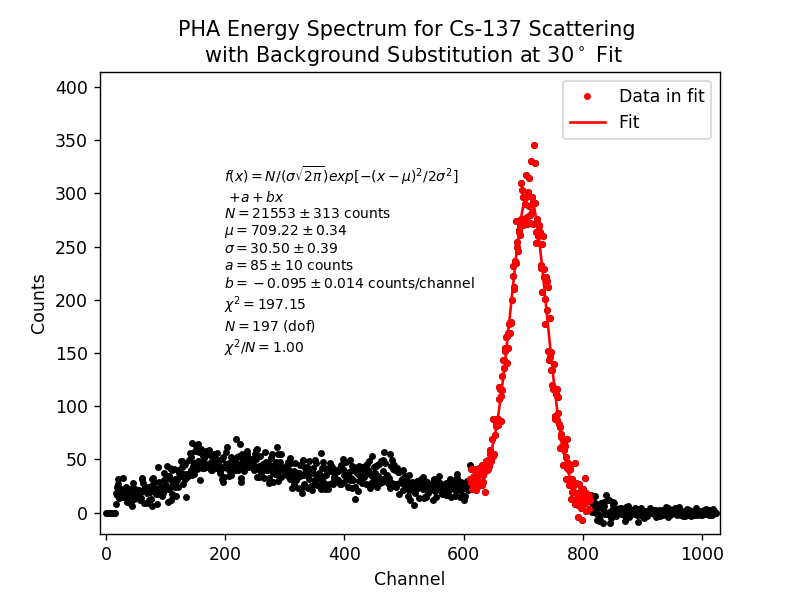

In [77]:
#Creating a fit for the background subtracted scattered spectrum

def fitfunc(p,x):
    return (p[0]/(p[2]*np.sqrt(2*np.pi)))*np.exp(-(x-p[1])**2/((p[2]**2)*2))+p[3]+p[4]*x
def residual(p, x, y, err):
    return (fitfunc(p, x)-y)/err

p0 = [5000., 715., 30., 100., 0.1]

# Sets the lower and upper bounds of the region of interest

b=611
t=813

channel2 = channel[b:t]
N2 = N_bkg_sub[b:t]
dN2 = dN_bkg_sub[b:t]
pf, cov, info, mesg, success = optimize.leastsq(residual, p0, args=(channel2, N2, dN2),
                                                full_output=1)

if cov is None:
    print('Fit did not converge')
    print('Success code:', success)
    print(mesg)
else:
    chisq = sum(info['fvec']*info['fvec'])
    dof = len(channel2) - len(pf)
    pferr = [np.sqrt(cov[i,i]) for i in range(len(pf))]
    print('Converged with chi-squared', chisq)
    print('Number of degrees of freedom, dof =', dof)
    print('Reduced chi-squared ', chisq/dof)
    print('Inital guess values:')
    print('  p0 =', p0)
    print('Best fit values:')
    print('  pf =', pf)
    print('Uncertainties in the best fit values:')
    print('  pferr =', pferr)
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(channel, N_bkg_sub, 'k.')
ax.plot(channel2, N2, 'r.', label='Data in fit')

    
# We then plot the fit function. We could plot it at each point in "channel2"
#  and connect those points with straight lines. However, we may want a smoother
#  plot. To do so, we create a new array of points using "linspace()" that covers
#  the same range, but more densely. When we connect these points, the line will
#  be more smooth.
CHANNEL = np.linspace(min(channel2), max(channel2), 5000)
ax.plot(CHANNEL, fitfunc(pf, CHANNEL), 'r-', label='Fit')

ax.axis([-10,1030,min(N_bkg_sub)-10,max(N)+50])
ax.set_title('PHA Energy Spectrum for Cs-137 Scattering \n with Background Substitution at 30$^\\circ$ Fit')
ax.set_xlabel('Channel')
ax.set_ylabel('Counts')
ax.legend()

textfit1 = '$f(x) = N/( \\sigma\\sqrt{2\\pi})exp[-(x-\\mu)^2/2\\sigma^2]$ \n $+a+bx$ \n' \
               '$N = %.0f \pm %.0f$ counts \n' \
               '$\\mu = %.2f \pm %.2f$\n' \
               '$\\sigma = %.2f \pm %.2f$ \n' \
               '$a = %.0f \pm %.0f$ counts \n' \
               '$b = %.3f \pm %.3f$ counts/channel \n' \
                '$\chi^2= %.2f$ \n' \
               '$N = %i$ (dof) \n' \
               '$\chi^2/N = %.2f$' \
                % (pf[0], pferr[0], pf[1], pferr[1], pf[2], pferr[2], pf[3], pferr[3], pf[4], pferr[4], chisq, dof, chisq/dof)
ax.text(0.2, .8, textfit1, transform=ax.transAxes, fontsize=8,
             verticalalignment='top')

plt.savefig('Exp2_30_scatt_0512_bkg_sub_fit.pdf')
plt.show()